<h1 align=center><font size = 6>Potential Business opportunity in Coax's Bazar: Comparative Data Analysis with equivalent Cities of India and Malaysia</font></h1>

##### Environment Setup

In [311]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [312]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [313]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [314]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [315]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [316]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


###### Import Libraries

In [317]:
import pandas as pd
import numpy as np
from pandas.io.html import read_html
import geocoder
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import folium
import requests
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
%matplotlib inline 
import matplotlib.patches as mpatches
import sys
print("Imported")

Imported


In [318]:
# Setup the foursqure API setup

CLIENT_ID = 'XNEXOP42BZTJAHJREQYEH4W5TZKCPUJNEGCFKMR3BG1MGW4M' # your Foursquare ID
CLIENT_SECRET = 'FGT1L3QYQSFRMWAGHHC4UBJ1U53C5CIQW5DNKJ3Z2HKEEMZH' # your Foursquare Secret
VERSION = '20200101'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XNEXOP42BZTJAHJREQYEH4W5TZKCPUJNEGCFKMR3BG1MGW4M
CLIENT_SECRET:FGT1L3QYQSFRMWAGHHC4UBJ1U53C5CIQW5DNKJ3Z2HKEEMZH


###### Prepare DataFrame from primarily collected data

In [319]:
# location data of coax's bazar from the website of the Ministry of Post and Telecommunication of the Government of Bangladesh
path_coax='Coax bazar.csv'
loc_coax= pd.read_csv(path_coax)
loc_coax.head()

,location,neighbourhood,postal code,Latitude,Longitude
0,Cox's Bazar,Badarkali,4742,21.732884,91.955025
1,Cox's Bazar,Chiringga,4740,21.745316,92.059705
2,Cox's Bazar,Chiringga S.O,4741,21.718237,92.022854
3,Cox's Bazar,Malumghat,4743,21.671797,92.076212
4,Cox's Bazar,Coxs Bazar Sadar,4700,21.426932,92.005865


In [320]:
# get the latitude and longitude of cox bazer
address = "Cox'sbazar, Bangladesh"
geolocator = Nominatim(user_agent="Foursquare_agent")
location = geolocator.geocode(address)
coax_latitude = location.latitude
coax_longitude = location.longitude
print("Coax's Bazar Geographical coordinates are Latitude={}, Lngitude={} " .format(coax_latitude, coax_longitude))

Coax's Bazar Geographical coordinates are Latitude=21.4293506, Lngitude=91.9724146 


In [321]:
# Create a map of Coax's Bazer
coax_map = folium.Map(location=[coax_latitude, coax_longitude], zoom_start=11, control_scale = True)

for lat, lng, Borough, Neighbourhood in zip(loc_coax['Latitude'], loc_coax['Longitude'], loc_coax['location'], loc_coax['neighbourhood']):
    tag = '{}, {}'.format(Neighbourhood, Borough)
    tag = folium.Popup(tag, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=tag,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(coax_map)

coax_map.add_child(folium.LatLngPopup())
    
coax_map

In [322]:
# Location data of East Medinipur, West Bangle postal services website used to collect the postal information
path_empur = 'East Medinipur (Digha and Mandarmani).csv'
loc_empur=pd.read_csv(path_empur)
loc_empur.head()

,location,neighbourhood,postal code,Latitude,Longitude
0,Mandarmoni,Gopalchak,721423,21.777939,87.834543
1,Mandarmoni,Deuli,721423,21.682923,87.627414
2,Mandarmoni,Bodhra,721423,21.655692,87.583551
3,Mandarmoni,Narkuli,721423,21.691050,87.578472
4,Mandarmoni,Balisai,721423,21.677948,87.599038


In [324]:
# get the latitude and longitude of East Medinipur
address = "East Medinipur, India"
geolocator = Nominatim(user_agent="Foursquare_agent")
location = geolocator.geocode(address)
empur_latitude = location.latitude
empur_longitude = location.longitude
print("East Medinipur Geographical coordinates are Latitude={}, Lngitude={} " .format(empur_latitude, empur_longitude))

East Medinipur Geographical coordinates are Latitude=22.4207025, Lngitude=87.3269963 


In [325]:
# Create a map of East Medinipur
empur_map = folium.Map(location=[empur_latitude, empur_longitude], zoom_start=11, control_scale = True)

for lat, lng, Borough, Neighbourhood in zip(loc_empur['Latitude'], loc_empur['Longitude'], loc_empur['location'], loc_empur['neighbourhood']):
    tag = '{}, {}'.format(Neighbourhood, Borough)
    tag = folium.Popup(tag, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=tag,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(empur_map)

empur_map.add_child(folium.LatLngPopup())
    
empur_map

In [326]:
# Location data of Langkawi, the Malaysian national Postal Service POSMalaysia website used to collect postal information
path_langkawi='Langkawi.csv'
loc_langkawi=pd.read_csv(path_langkawi)
loc_langkawi.head()

,location,neighbourhood,postal code,Latitude,Longitude
0,Langkawi,Kelab Desa Langkawi,7000,6.391898,99.782611
1,Langkawi,Langkawi,7000,6.365918,99.780165
2,Langkawi,Taman Langkawi,7000,6.333786,99.816102
3,Langkawi,Taman Seri Langkawi,7000,6.328667,99.822043
4,Langkawi,Langkawi - Peti surat,7007,6.310936,99.856543


In [327]:
# get the latitude and longitude of Langkawi
address = "Langkawi, Malaysia"
geolocator = Nominatim(user_agent="Foursquare_agent")
location = geolocator.geocode(address)
langkawi_latitude = location.latitude
langkawi_longitude = location.longitude
print("Langkawi Geographical coordinates are Latitude={}, Lngitude={} " .format(coax_latitude, coax_longitude))

Langkawi Geographical coordinates are Latitude=21.4293506, Lngitude=91.9724146 


In [328]:
# Create a map of Langkawi
langkawi_map = folium.Map(location=[langkawi_latitude, langkawi_longitude], zoom_start=11, control_scale = True)

for lat, lng, Borough, Neighbourhood in zip(loc_langkawi['Latitude'], loc_langkawi['Longitude'], loc_langkawi['location'], loc_langkawi['neighbourhood']):
    tag = '{}, {}'.format(Neighbourhood, Borough)
    tag = folium.Popup(tag, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=tag,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(langkawi_map)

langkawi_map.add_child(folium.LatLngPopup())
    
langkawi_map

In [329]:
#declearing fuction to geeting nearby function from foursqure API

def getNearbyVenues (names, latitude, longitude, radius=2000, limit=100):
    
    venue_lst=[] # initialize empty list
    
    for name, lat, lng in zip (names, latitude, longitude):
        print(name)
        
    
        # Foursuare API explore generated per Neighbourhood lat / lng passed from datafreams
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
        
        # Get request
        results = requests.get(url).json()["response"]['groups'][0]['items']
                
        # return only relevant information for each nearby venue in the preliminary list
        venue_lst.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    venue_df = pd.DataFrame([item for venue_lst in venue_lst for item in venue_lst])
    venue_df.columns = ['Neighbourhood', 
                  'Neigh Latitude', 
                  'Neigh Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    print('{} venues were returned by Foursquare.'.format(venue_df.shape[0]))
    
    return (venue_df)

In [330]:
# Getting Venues In coax's bazar
coax_venue = getNearbyVenues (names=loc_coax['neighbourhood'], 
                                     latitude=loc_coax['Latitude'], 
                                     longitude=loc_coax['Longitude'])

Badarkali
Chiringga
Chiringga S.O
Malumghat
Coxs Bazar Sadar
Eidga
Zhilanja
Gorakghat
Airport
Ramu
Hnila
St.Martin
Teknaf
Ukhia
45 venues were returned by Foursquare.


In [331]:
coax_venue.head(20)

,Neighbourhood,Neigh Latitude,Neigh Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Malumghat,21.671797,92.076212,Dulahazra Safari Park,21.668002,92.079546,Park
1,Coxs Bazar Sadar,21.426932,92.005865,"Inter City Bus Terminal, Cox's Bazar",21.427274,92.005004,Bus Station
2,Coxs Bazar Sadar,21.426932,92.005865,Mermaid Beach,21.427736,92.004646,Resort
3,Eidga,21.440109,91.975395,Cox's Bazar Sea Beach,21.423649,91.976262,Surf Spot
4,Eidga,21.440109,91.975395,Laboni Point,21.425781,91.973835,Beach
5,Eidga,21.440109,91.975395,"CAFÉ 14, Long Beach Hotel",21.426031,91.978536,Café
6,Eidga,21.440109,91.975395,Niribili Restora,21.427077,91.978216,Seafood Restaurant
7,Eidga,21.440109,91.975395,Long Beach Hotel,21.425773,91.978672,Hotel
8,Eidga,21.440109,91.975395,Poushee Hotel and Restaurant,21.442345,91.970410,Restaurant
9,Eidga,21.440109,91.975395,Handi,21.427234,91.974365,Indian Restaurant


In [332]:
# Counting the number of diffrent types of venue
coax_venue['Venue'].groupby(coax_venue['Venue Category']).count()

Venue Category
Airport                2
Arts & Crafts Store    3
Bakery                 1
Beach                  7
Boat or Ferry          1
Bus Station            3
Café                   2
Fish & Chips Shop      1
Hotel                  6
Indian Restaurant      2
Park                   1
Resort                 5
Restaurant             4
Seafood Restaurant     4
Surf Spot              2
Trail                  1
Name: Venue, dtype: int64

In [333]:
# counting the number of venue in diffrent neibourhood
coax_venue['Venue'].groupby(coax_venue['Neighbourhood']).count()

Neighbourhood
Airport              4
Coxs Bazar Sadar     2
Eidga               11
Gorakghat            1
Hnila                1
Malumghat            1
Ramu                 2
St.Martin            8
Teknaf               2
Zhilanja            13
Name: Venue, dtype: int64

In [334]:
coax_venue['Venue'].groupby(coax_venue['Venue Category']).count().sort_values(ascending=False).head(20)

Venue Category
Beach                  7
Hotel                  6
Resort                 5
Seafood Restaurant     4
Restaurant             4
Bus Station            3
Arts & Crafts Store    3
Surf Spot              2
Indian Restaurant      2
Café                   2
Airport                2
Trail                  1
Park                   1
Fish & Chips Shop      1
Boat or Ferry          1
Bakery                 1
Name: Venue, dtype: int64

In [335]:
# Getting Venues In East Medinipur
empur_venue = getNearbyVenues (names=loc_empur['neighbourhood'], 
                                     latitude=loc_empur['Latitude'], 
                                     longitude=loc_empur['Longitude'])

Gopalchak 
Deuli
Bodhra
Narkuli
Balisai
Satilapur
Narandia
Karanji
Dakhin Badalpur
Shyampur
Chaulkhola
Islampur
Dakshin Kalyanpur
Pichabani
Bhuniajibarh
Silampur
Kalindi
Dadanpatrabarh
Kalindi Teghari
Mandarmoni
Digha
Paya-Medinipur
Saripur
Digha New Township
34 venues were returned by Foursquare.


In [336]:
# Counting the number of diffrent types of venue
empur_venue['Venue'].groupby(empur_venue['Venue Category']).count()

Venue Category
ATM                                4
Beach                              9
Hotel                             14
Indian Restaurant                  2
Multicuisine Indian Restaurant     1
Resort                             2
Train Station                      2
Name: Venue, dtype: int64

In [337]:
# counting the number of venue in diffrent neibourhood
empur_venue['Venue'].groupby(empur_venue['Neighbourhood']).count()

Neighbourhood
Balisai               1
Bodhra                1
Chaulkhola            2
Dadanpatrabarh        3
Digha                 7
Digha New Township    5
Gopalchak             1
Mandarmoni            4
Narandia              1
Saripur               4
Satilapur             1
Silampur              4
Name: Venue, dtype: int64

In [338]:
empur_venue['Venue'].groupby(empur_venue['Venue Category']).count().sort_values(ascending=False).head(20)

Venue Category
Hotel                             14
Beach                              9
ATM                                4
Train Station                      2
Resort                             2
Indian Restaurant                  2
Multicuisine Indian Restaurant     1
Name: Venue, dtype: int64

In [339]:
# Getting Venues In Langkawi
langkawi_venue = getNearbyVenues (names=loc_langkawi['neighbourhood'], 
                                     latitude=loc_langkawi['Latitude'], 
                                     longitude=loc_langkawi['Longitude'])

Kelab Desa Langkawi
Langkawi
Taman Langkawi
Taman Seri Langkawi
Langkawi - Peti surat
Langkawi - Beg berkunci
199 venues were returned by Foursquare.


In [340]:
# Counting the number of diffrent types of venue
langkawi_venue['Venue'].groupby(langkawi_venue['Venue Category']).count()

Venue Category
American Restaurant     1
Art Gallery             1
Asian Restaurant       12
Athletics & Sports      1
Bakery                  2
                       ..
Surf Spot               1
Tennis Court            1
Thai Restaurant         4
Theme Park              2
Wine Bar                1
Name: Venue, Length: 69, dtype: int64

In [341]:
# counting the number of venue in diffrent neibourhood
langkawi_venue['Venue'].groupby(langkawi_venue['Neighbourhood']).count()

Neighbourhood
Kelab Desa Langkawi          4
Langkawi                    17
Langkawi - Beg berkunci      8
Langkawi - Peti surat      100
Taman Langkawi              27
Taman Seri Langkawi         43
Name: Venue, dtype: int64

In [342]:
langkawi_venue['Venue'].groupby(langkawi_venue['Venue Category']).count().sort_values(ascending=False).head(20)

Venue Category
Malay Restaurant         22
Seafood Restaurant       12
Asian Restaurant         12
Hotel                    10
Resort                   10
Motel                     8
Restaurant                7
Café                      6
Food Court                5
Flea Market               5
Halal Restaurant          5
Breakfast Spot            4
Shopping Mall             4
Indonesian Restaurant     4
Park                      4
Thai Restaurant           4
Food Truck                3
Department Store          3
Convenience Store         3
Chinese Restaurant        3
Name: Venue, dtype: int64

In [343]:
# Save coax's bazar  venues data into  CSV file
coax_venue.to_csv(r'Venue_of_coaxbazar.csv', index=False)

In [344]:
# Save east medinipur venues data into  CSV file
empur_venue.to_csv(r'Venue_of_eastmedinipur.csv', index=False)

In [345]:
# Save langkawi venues data into  CSV file
langkawi_venue.to_csv(r'Venue_of_langkawi.csv', index=False)

In [346]:
# defining waffle chart, next it was used to vesualize the data
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (ef['Venue Category'][i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()
    fig.set_figwidth(40) # set width
    fig.set_figheight(20) # set height


    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
       
    )

Total number of tiles is 480
Beach: 88
Hotel: 76
Resort: 63
Seafood Restaurant: 51
Restaurant: 51
Bus Station: 38
Arts & Crafts Store: 38
Surf Spot: 25
Indian Restaurant: 25
Café: 25


<Figure size 2880x1440 with 0 Axes>

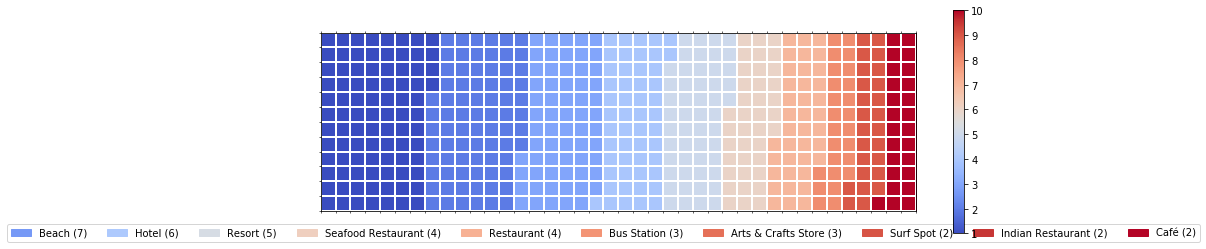

In [347]:
# Waffle chart of Top 10 Venue Category of Coax's Bazer
ef=pd.DataFrame(coax_venue['Venue'].groupby(coax_venue['Venue Category']).count().sort_values(ascending=False).head(10))
ef.reset_index(inplace=True)
ef.rename(columns={"Venue": "total"}, inplace=True)
ef.head()

width = 40 # width of chart
height = 12 # height of chart

categories = ef['Venue Category'] # categories
values = ef['total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

Total number of tiles is 480
Hotel: 198
Beach: 127
ATM: 56
Train Station: 28
Resort: 28
Indian Restaurant: 28
Multicuisine Indian Restaurant: 14


<Figure size 2880x1440 with 0 Axes>

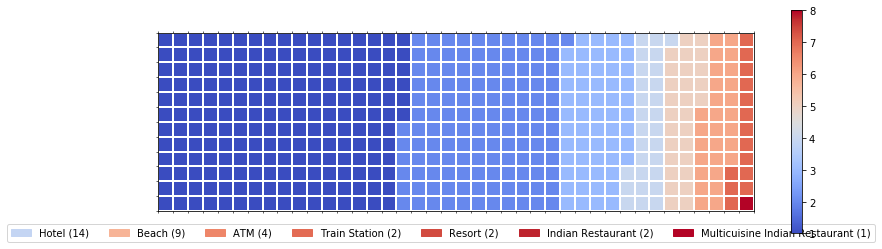

In [348]:
# Waffle chart of Top 10 Venue Category of East Medanipur
ef=pd.DataFrame(empur_venue['Venue'].groupby(empur_venue['Venue Category']).count().sort_values(ascending=False).head(10))
ef.reset_index(inplace=True)
ef.rename(columns={"Venue": "total"}, inplace=True)
ef.head()

width = 40 # width of chart
height = 12 # height of chart

categories = ef['Venue Category'] # categories
values = ef['total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

Total number of tiles is 480
Malay Restaurant: 109
Seafood Restaurant: 59
Asian Restaurant: 59
Hotel: 49
Resort: 49
Motel: 40
Restaurant: 35
Café: 30
Food Court: 25
Flea Market: 25


<Figure size 2880x1440 with 0 Axes>

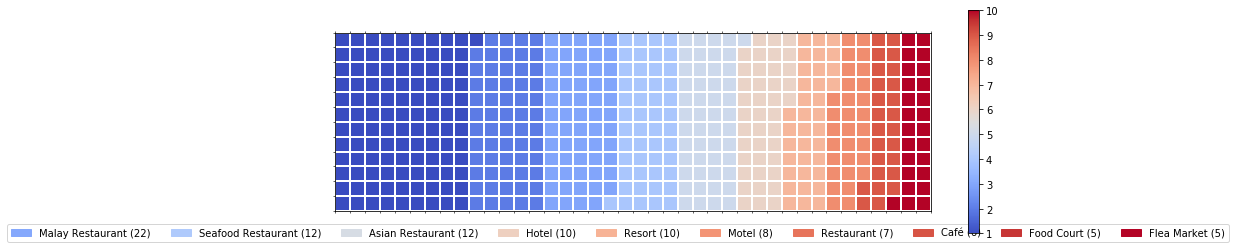

In [349]:
# Waffle chart of Top 10 Venue Category of Langkawi
ef=pd.DataFrame(langkawi_venue['Venue'].groupby(langkawi_venue['Venue Category']).count().sort_values(ascending=False).head(10))
ef.reset_index(inplace=True)
ef.rename(columns={"Venue": "total"}, inplace=True)
ef.head()

width = 40 # width of chart
height = 12 # height of chart

categories = ef['Venue Category'] # categories
values = ef['total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

In [368]:
coax_venue['Venue Category'].unique()

array(['Park', 'Bus Station', 'Resort', 'Surf Spot', 'Beach', 'Café',
       'Seafood Restaurant', 'Hotel', 'Restaurant', 'Indian Restaurant',
       'Arts & Crafts Store', 'Airport', 'Trail', 'Bakery',
       'Boat or Ferry', 'Fish & Chips Shop'], dtype=object)

In [354]:
empur_venue['Venue Category'].unique()

array(['ATM', 'Hotel', 'Beach', 'Resort', 'Indian Restaurant',
       'Multicuisine Indian Restaurant', 'Train Station'], dtype=object)

In [355]:
langkawi_venue['Venue Category'].unique()

array(['Malay Restaurant', 'Café', 'Motel', 'Theme Park', 'Racetrack',
       'Restaurant', 'Park', 'Asian Restaurant', 'Boat or Ferry',
       'Bakery', 'Lake', 'Garden Center', 'Breakfast Spot', 'Resort',
       'Hotel', 'Convenience Store', 'Market', 'Bed & Breakfast',
       'Burger Joint', 'Seafood Restaurant', 'Halal Restaurant',
       'Food Court', 'Food', 'Flea Market', 'Food Truck',
       'Thai Restaurant', 'Indonesian Restaurant', 'Soccer Field',
       'Beach', 'Korean Restaurant', 'Department Store', 'Shopping Mall',
       'Chinese Restaurant', 'Music Store', 'Harbor / Marina', 'Island',
       'Monument / Landmark', 'Bowling Alley', 'Coffee Shop', 'Spa',
       'Ice Cream Shop', 'American Restaurant', 'Candy Store',
       'Middle Eastern Restaurant', 'Fast Food Restaurant', 'Bistro',
       'Wine Bar', 'Smoke Shop', 'Diner', 'Athletics & Sports',
       'Miscellaneous Shop', 'Scenic Lookout', 'Pharmacy', 'Boutique',
       'Liquor Store', 'Playground', 'Bank', 'Tennis 

In [359]:
print("Number of unique Venue Category in Coax's Bazar:", coax_venue['Venue Category'].nunique())

Number of unique Venue Category in Coax's Bazar: 16


In [360]:
print("Number of unique Venue Category in East Medenipur:", empur_venue['Venue Category'].nunique())

Number of unique Venue Category in East Medenipur: 7


In [361]:
print("Number of unique Venue Category in Langklawi:", langkawi_venue['Venue Category'].nunique())

Number of unique Venue Category in Langklawi: 69
